# FoodHub Data Analysis 

This notebook is a polished and extended version of the original analysis completed by **Luciano Lovera** on **September 10, 2022**, as part of the **Postgraduate Program in Data Science and Business Analytics** at the **University of Texas**.  

It has been updated and refined for inclusion in a professional GitHub portfolio to showcase practical data analysis skills and business insights.


## Context

With the rise in restaurant options and the fast-paced lifestyle of students and professionals in New York, food delivery platforms like **FoodHub** offer convenience and efficiency. The company connects customers with multiple restaurants via a single app. Once the order is confirmed, a delivery person is dispatched to pick it up and deliver it, with FoodHub earning revenue through commission fees.



## Objective

The company seeks to analyze delivery data to better understand restaurant demand, customer satisfaction, and platform efficiency. As a Data Scientist, your task is to extract insights and recommend improvements based on patterns observed in the data.


## Dataset Overview

The dataset contains **1,898** food delivery orders and includes the following features:

- `order_id`: Unique ID of the order  
- `customer_id`: ID of the customer who placed the order  
- `restaurant_name`: Name of the restaurant  
- `cuisine_type`: Type of cuisine ordered  
- `cost_of_the_order`: Total cost in USD  
- `day_of_the_week`: Whether the order was placed on a weekday or weekend  
- `rating`: Customer rating (1–5 or Not Given)  
- `food_preparation_time`: Time (in minutes) the restaurant took to prepare the food  
- `delivery_time`: Time (in minutes) taken for delivery  

---

We will now explore this dataset across several categories to uncover business trends, behavioral insights, and performance metrics.


### 1. User Behavior & Demand Patterns
- Import and basic info
- Most popular cuisines & restaurants
- Top customers
- Orders by weekday

### 2. Cost & Time Insights
- Distribution and boxplots of cost
- Delivery & preparation time by cuisine
- Weekend vs weekday delivery patterns
- High-value order proportion
- Total revenue by commission policy

### 3. Ratings & Satisfaction Analysis
- Rating distribution and missing data
- Time vs rating (prep, delivery, total)
- Cost vs rating
---



## 1. User Behavior & Demand Patterns

This section explores customer behavior on the FoodHub platform:
- What are typical spending habits?
- Which cuisine types are most popular?
- When do people order the most?
- Which restaurants receive the most traffic?

<!-- # FoodHub Data Analysis Report

This notebook is a **refined and extended version** of a project originally developed by **Luciano Lovera** on **September 10, 2022**, as part of the **Postgraduate Program in Data Science and Business Analytics** offered by the **University of Texas**.

It is now being published on GitHub as part of a professional portfolio, aiming to showcase data-driven thinking, analytical depth, and clear storytelling using Python.

---


## Project Overview

The goal of this analysis is to extract valuable business insights from transactional data provided by **FoodHub**, a simulated food delivery aggregator platform.

### Key Objectives:
- Analyze customer ordering patterns and cuisine preferences.
- Evaluate restaurant performance using ratings and volume.
- Understand preparation and delivery efficiency.
- Develop strategic business recommendations supported by data.

---

## Tools & Technologies

- **Python** for data wrangling and logic (Pandas, NumPy)
- **Seaborn & Matplotlib** for visualization
- **Jupyter Notebook** for documentation and exploration -->


## 1.1 Data Import and Initial Inspection

**Objective:**  
Load the dataset and perform an initial exploration to understand its structure, dimensions, and potential data quality issues.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("foodhub_order.csv")
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


## 1.2 Dataset Structure: Dimensions, Types, and Missing Values

**Objective:**  
Understand the overall shape of the dataset, verify data types, and identify any missing values that may affect analysis.


In [32]:
# Dataset dimensions
print("Dataset shape:", df.shape)

Dataset shape: (1898, 9)


In [33]:
# Check data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [34]:
# Check for missing values
df.isnull().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

## 1.3 Column Overview and Unique Values

### Objective: 
Explore the categorical columns to understand what values are available for key features such as cuisine type, rating, and day of the week.


In [35]:
# Unique values for key categorical features
print("Day of the week:", df['day_of_the_week'].unique())
print("Ratings:", df['rating'].unique())
print("Cuisine types:", df['cuisine_type'].unique())
print("Number of unique restaurants:", df['restaurant_name'].nunique())



Day of the week: ['Weekend' 'Weekday']
Ratings: ['Not given' '5' '3' '4']
Cuisine types: ['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']
Number of unique restaurants: 178


## 1.4 Summary Statistics for Numerical Columns

### Objective: 
Generate descriptive statistics to identify typical ranges, distributions, and potential outliers for numerical features.


In [36]:
# Summary statistics for numerical features
df.describe()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000



## 1.5 Order Cost Distribution

### Objective: 
Understand how much customers typically spend per order. Identifying pricing patterns and outliers can inform pricing strategy, promotions, and service tiering.



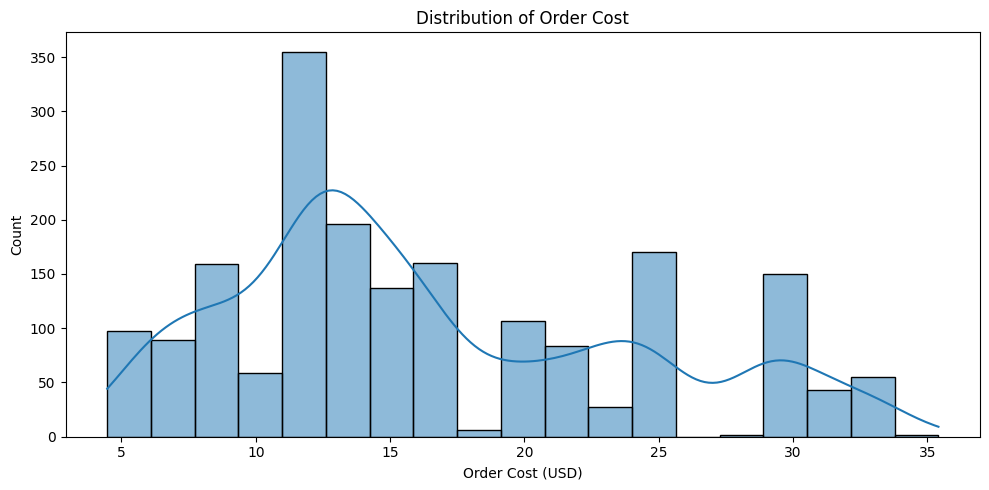

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.title("Distribution of Order Cost")
plt.xlabel("Order Cost (USD)")
plt.tight_layout()
plt.show()




### Key Observations:
- **Most orders fall between $10 and $15**, indicating a strong clustering in this mid-range pricing tier.
- There's a **right-skewed distribution**, with fewer high-cost orders above $25.
- A **smaller peak** appears near the $30 mark, possibly reflecting a premium meal tier or bundled items.
- **Low-cost orders (under $10)** are relatively less frequent, suggesting customers tend to spend at least a moderate amount per order.

### Business Implications:
- The dominant pricing bracket ($10–$15) should be the focus of **core offerings and value promotions**.
- Orders above $20 may be **targeted with upselling strategies** or delivery-based incentives (e.g., free delivery over $25).
- The presence of multiple modes suggests potential for **tiered menu pricing**, offering entry, standard, and premium options.
- Further segmentation by cuisine type or restaurant may reveal **which categories contribute most to high or low-cost orders**, allowing more tailored pricing strategies.

### Recommendation:
FoodHub should align menu structuring and promotions around the $10–$15 range, while strategically nudging users toward higher-value orders with loyalty rewards, discounts for larger baskets, or bundled deals.

## 1.5.1 Boxplot of Order Cost – Analysis

The boxplot provides a summary of the distribution of order costs, highlighting central tendency, spread, and potential outliers.


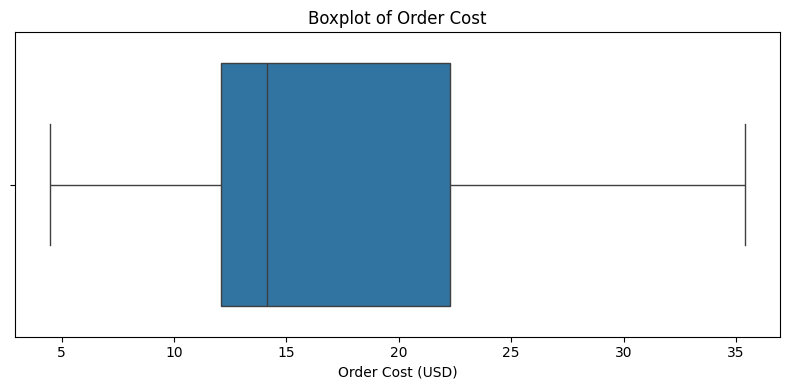

In [38]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='cost_of_the_order')
plt.title("Boxplot of Order Cost")
plt.xlabel("Order Cost (USD)")
plt.tight_layout()
plt.show()


### Key Observations:
- **Median Order Cost** is approximately **$15**, suggesting this is the most typical spending behavior.
- The **interquartile range (IQR)** spans roughly from **$12 to $20**, indicating that 50% of all orders fall within this cost range.
- **Minimum and maximum values** are approximately **$5 and $35**, showing the full range of order costs.
- There are **no extreme outliers**, suggesting that most orders conform to a standard pricing structure.

### Business Implications:
- The tight spread within the IQR highlights **consistent customer spending habits**, which can be leveraged for pricing strategies and value bundling.
- Since the median falls below the $20 threshold, **most orders do not reach the higher commission tier**, representing an opportunity to incentivize larger basket sizes.
- This analysis reinforces the idea of promoting order upgrades or combos that push total cost just above the $20 mark.

### Recommendation:
Introduce promotions like **"spend $18, get a discount"** or **"free delivery over $20"** to encourage customers to slightly increase their basket size, improving platform revenue under the current commission structure.

## 1.6 Order Cost by Cuisine Type
 ### Objetive: 
Understand how average order cost varies across different cuisine types to support pricing strategies and customer segmentation.


C:\Users\Luciano Lovera\AppData\Local\Temp\ipykernel_17232\1327965246.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


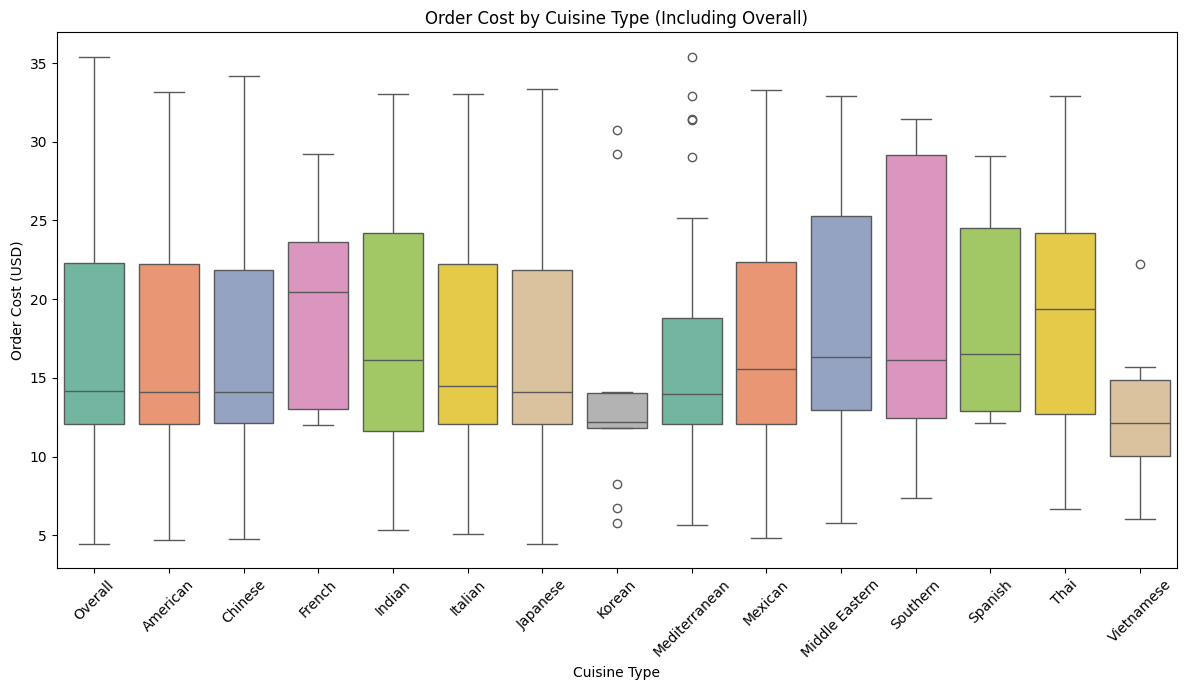

In [39]:
df_box = df.copy()
df_box['cuisine_type'] = df_box['cuisine_type'].astype(str)

df_overall = df.copy()
df_overall['cuisine_type'] = 'Overall'

df_combined = pd.concat([df_overall, df_box], ignore_index=True)

cuisine_order = ['Overall'] + sorted(df['cuisine_type'].unique())

palette = sns.color_palette("Set2", len(cuisine_order))
palette_dict = dict(zip(cuisine_order, palette))

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_combined,
    x='cuisine_type',
    y='cost_of_the_order',
    order=cuisine_order,
    palette=palette_dict
)

plt.title("Order Cost by Cuisine Type (Including Overall)")
plt.xlabel("Cuisine Type")
plt.ylabel("Order Cost (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Insights:

- **Overall vs. American Cuisine**:  
  *The distribution of the "Overall" category closely resembles that of **American cuisine**, which likely reflects the dominance of American orders in the dataset. This suggests that aggregate metrics might be skewed by the most frequent cuisine type and should be interpreted with caution.*

- **Korean Cuisine**:  
  *Korean orders have one of the lowest median costs and the narrowest interquartile ranges (IQRs), indicating high consistency in pricing. Aside from a few high-value outliers, most orders stay within a tight cost range. This could appeal to budget-conscious users or signal standardization in Korean menu pricing.*

- **French, Spanish, and Southern Cuisines**:  
  *These cuisines exhibit wider cost ranges and higher medians, especially **Southern** and **French**, which may reflect premium offerings or less standardized pricing.*

- **Middle Eastern and Thai**:  
  *Both have relatively high medians and broader spread, which suggests varied offerings with both budget and premium options.*

### Business Implications:

- **Skewed Aggregates**:  
  Analysts should avoid relying solely on overall metrics when one cuisine type (e.g., American) dominates. Separate segment-level views provide more actionable insights.

- **Strategic Pricing & Targeting**:  
  Cuisine types with consistent low costs (like Korean) could be positioned for affordability-focused promotions. Conversely, high-cost cuisines with wider variability could be targeted with premium delivery experiences, bundling, or loyalty rewards.

- **Highlight Predictability**:  
  Platforms like FoodHub can highlight cuisines with stable pricing and quality (low cost variance) to users seeking reliability.

- **Monitor Outliers**:  
  High-cost outliers in cuisines like French and Middle Eastern could represent high-value customers or upselling opportunities worth exploring further.

## 1.6.1 Cuisine Type Distribution
### Objective:

To summarize the distribution of order costs and identify the central range where most customer spending occurs. This helps in understanding customer purchasing behavior and informs pricing and promotional strategies.



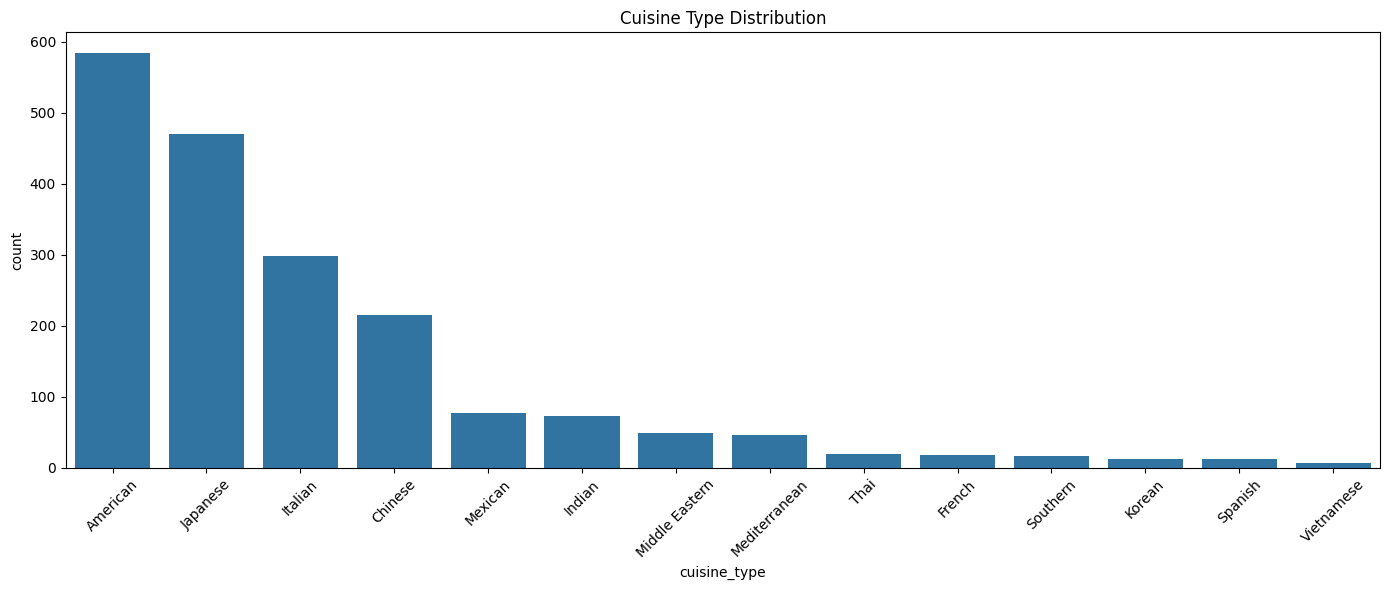

In [40]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.title("Cuisine Type Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analysis:
American, Japanese, and Italian cuisines appear to be the most frequently ordered, suggesting strong user preference or greater availability on the platform. Other cuisine types show lower demand, which could reflect niche markets or fewer partner restaurants.

This distribution can help the company prioritize cuisines for promotions, onboarding new restaurants, or featuring them more prominently in the app.



## 1.7 Top 5 Restaurants by Number of Orders 



C:\Users\Luciano Lovera\AppData\Local\Temp\ipykernel_17232\2175433763.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


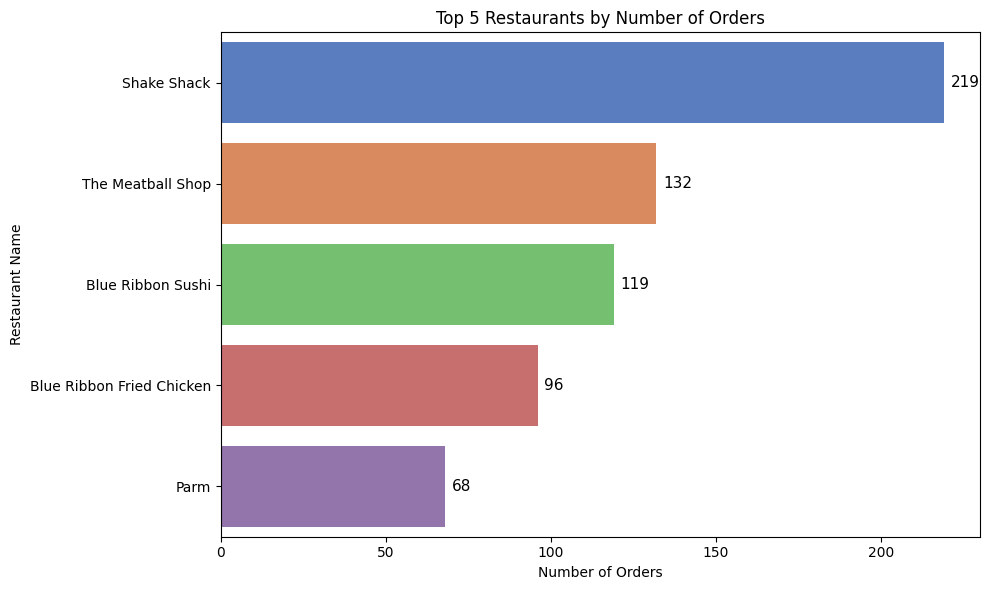

In [41]:
# Top 5 restaurants by number of orders
top_restaurants = df['restaurant_name'].value_counts().head(5)

# Define a distinct color for each bar
colors = sns.color_palette("muted", len(top_restaurants))

# Plot with color per bar
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_restaurants.values,
    y=top_restaurants.index,
    palette=colors
)

plt.title("Top 5 Restaurants by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")

# Add labels to the end of each bar
for i, value in enumerate(top_restaurants.values):
    plt.text(value + 2, i, str(value), va='center', fontsize=11)

plt.tight_layout()
plt.show()

**Key Observations:**

- Shake Shack leads significantly, followed by The Meatball Shop and Blue Ribbon Sushi.
- The difference in order volume between the top restaurant and others is substantial, suggesting a strong brand preference or strategic location.

**Business Implications:**

- High-performing restaurants like Shake Shack could be targeted for premium promotional partnerships.
- Restaurants with lower but still significant order volumes could benefit from exposure strategies to close the gap with top performers.

### 1.7.1 Top 3 Most Frequent Customers


Top 3 Customers and Their Number of Orders:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


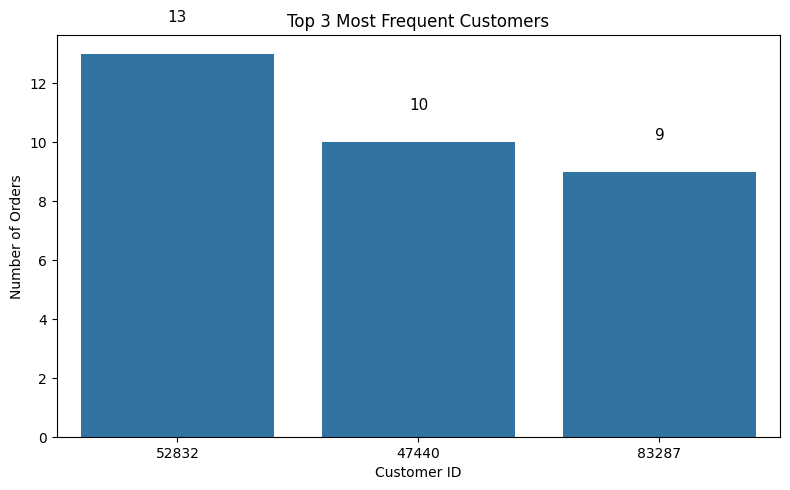

In [42]:
# Identify top 3 most frequent customers
top_customers = df['customer_id'].value_counts().head(3)

# Display results
print("Top 3 Customers and Their Number of Orders:")
print(top_customers)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title("Top 3 Most Frequent Customers")
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")

# Annotate bars
for i, value in enumerate(top_customers.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


Key Observations:
- **Customer 52832** placed the most orders (**13**), showing the highest level of engagement.
- **Customer 47440** follows with **10** orders, and **Customer 83287** placed **9**.
- These three users demonstrate strong loyalty and consistent usage of the service.

###  Business Implications:
- **Loyalty Program Potential:** These frequent buyers could be prime candidates for loyalty rewards, special discounts, or personalized offers to reinforce retention.
- **High-Value Customer Insights:** Understanding the preferences and behaviors of these users can help create user segments that mirror profitable traits.
- **Feedback Opportunities:** Engaging these top customers through surveys or incentives for reviews may provide high-quality feedback to further enhance service quality.

## 1.8 Proportion of Orders Costing more than $20
### Objective:  
Visualize the proportion of food orders that cost more than $20 versus those that cost $20 or less. This helps identify potential opportunities for upselling, premium services, or tailored promotions based on customer spending behavior.


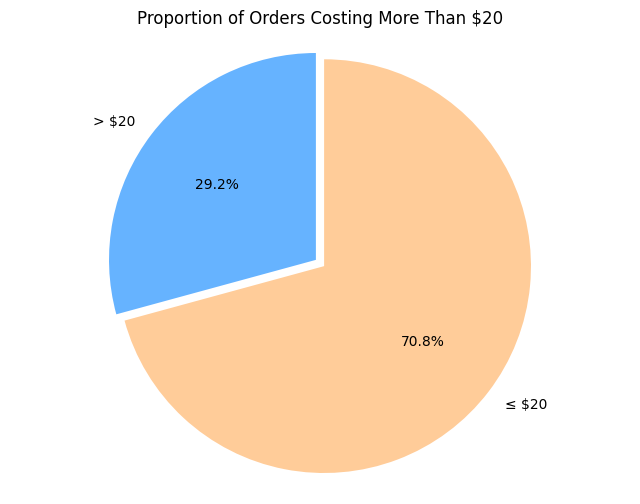

In [43]:
# Calculate percentage of orders costing more than $20
over_20 = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage_over_20 = round((over_20 / total_orders) * 100, 2)

# Visualization
plt.figure(figsize=(8, 6))
labels = ['> $20', '≤ $20']
sizes = [percentage_over_20, 100 - percentage_over_20]
colors = ['#66b3ff', '#ffcc99']
explode = (0.05, 0)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title("Proportion of Orders Costing More Than $20")
plt.axis('equal')
plt.show()

### Order Cost Distribution – Orders Over $20

This pie chart illustrates the proportion of food orders that cost more than $20.

**Key Observations:**

- Approximately **29.2%** of all orders cost more than $20.
- The majority of orders fall below the $20 mark, indicating price sensitivity or smaller order sizes among customers.

**Business Implications:**

- Since most orders are under $20, upselling strategies (e.g., bundle deals, premium add-ons) could help increase the average order value.
- High-cost orders (> $20) may represent group or premium purchases, suggesting opportunities for targeted loyalty rewards or segmented marketing.


## 1.8 High-Value Order Analysis
### Objective:  
Compare the volume of orders based on cost brackets—specifically, the number of orders above $20 versus those at or below $20. This allows us to quantify customer spending habits and identify how many orders qualify for higher commission revenue or premium promotions.


C:\Users\Luciano Lovera\AppData\Local\Temp\ipykernel_17232\1231674852.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette='pastel')


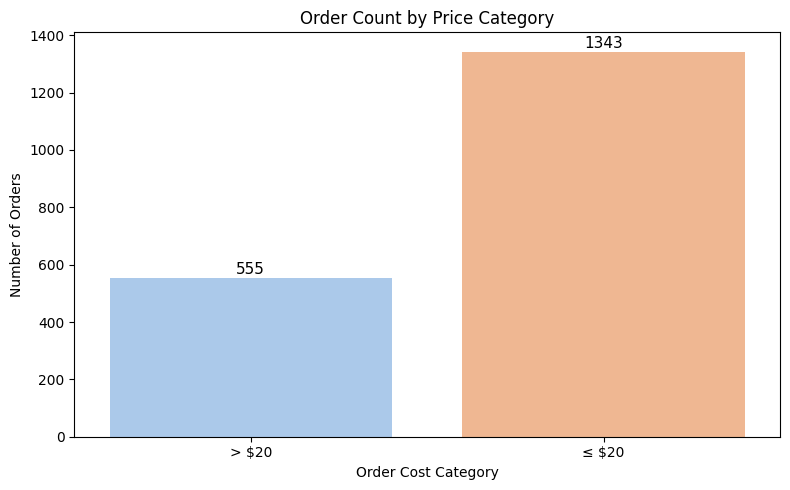

In [44]:
high_cost_orders = df[df['cost_of_the_order'] > 20]


categories = ['> $20', '≤ $20']
values = [len(high_cost_orders), len(df) - len(high_cost_orders)]


plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=values, palette='pastel')
plt.title("Order Count by Price Category")
plt.ylabel("Number of Orders")
plt.xlabel("Order Cost Category")

for i, val in enumerate(values):
    plt.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()



### Insight: Order Cost Distribution

The bar chart illustrates the distribution of orders based on whether the total cost exceeds $20 or not:

- **Orders above $20**: 555  
- **Orders $20 or less**: 1,343  
- **Percentage of high-cost orders**: 29.2%

This clearly shows that the majority of customers (over 70%) tend to place lower-cost orders. However, the 29.2% of higher-value orders still represent a significant revenue stream, especially considering that these are subject to a higher commission rate (25%).

### Strategic Recommendations:
To encourage more high-value orders, the company could introduce incentives such as:

- Bundle deals (e.g., meal combos or “add dessert for $5”)
- Free delivery for orders exceeding a certain amount
- Loyalty points or rewards for premium orders


## 1.9 Orders by Day of the Week
### Objetive: 
Analyze the distribution of orders by day of the week to identify usage patterns and determine when customers are most likely to use the platform. Understanding this behavior helps optimize staffing, delivery operations, and marketing efforts based on peak demand periods.



C:\Users\Luciano Lovera\AppData\Local\Temp\ipykernel_17232\1012229927.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


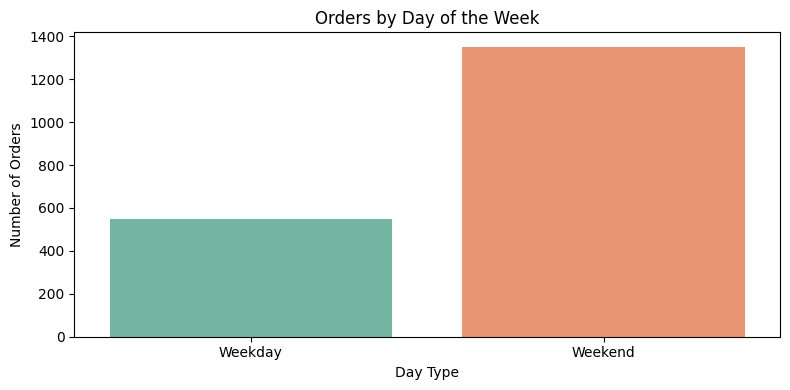

In [45]:
# Get order of categories to ensure consistent color mapping
day_order = sorted(df['day_of_the_week'].unique())

# Define custom colors
palette = sns.color_palette("Set2", len(day_order))

# Plot with custom colors
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x='day_of_the_week',
    order=day_order,
    palette=palette
)

plt.title("Orders by Day of the Week")
plt.xlabel("Day Type")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


### Key observations: 

The chart reveals a **significantly higher number of orders placed on weekends** compared to weekdays. This pattern suggests that customers are more inclined to order food during their free time—possibly while spending time with family or friends, relaxing at home, or celebrating social events.


 Weekday Opportunity

The **lower order volume during weekdays** could be attributed to customers’ busy schedules related to work, school, or commuting. However, this presents a strategic opportunity for FoodHub to drive engagement by addressing weekday-specific pain points through:

- **Promotional messaging ideas:**
  - “Stuck at work with no time to cook? Let FoodHub bring your favorite meal right to your desk.”
- **Targeted weekday campaigns:**
  - Lunchtime discounts for office hours.
  - Subscription perks for frequent weekday users.


 Weekend Engagement

While weekends already show strong performance, FoodHub can **further enhance value and engagement** by tying offers to social and recreational activities:

- **Promotion examples:**
  - “Game Night Combo: Order your favorite wings and get free drinks while your team plays!”
- **Experience-based bundles:**
  - Limited-time celebration menus (e.g., birthday kits, movie-night bundles).
  - Partner with restaurants for event-based promos.


 Strategic Implication

By customizing engagement strategies for different day types, FoodHub can:

- **Balance order volumes** across the week.
- **Boost user retention** through personalized offers.
- Strengthen its brand as a platform that delivers convenience for **every situation**, whether it’s a busy weekday or a relaxing weekend.



### 1.9.2 Top 5 Most popular Cuisines on weekends
### Objective:

Identify the top 5 most popular cuisine types ordered on weekends to understand customer preferences during leisure days. This analysis helps uncover which cuisines drive the highest engagement when customers are more likely to dine at home or celebrate social occasions, supporting marketing, menu placement, and promotional strategy.


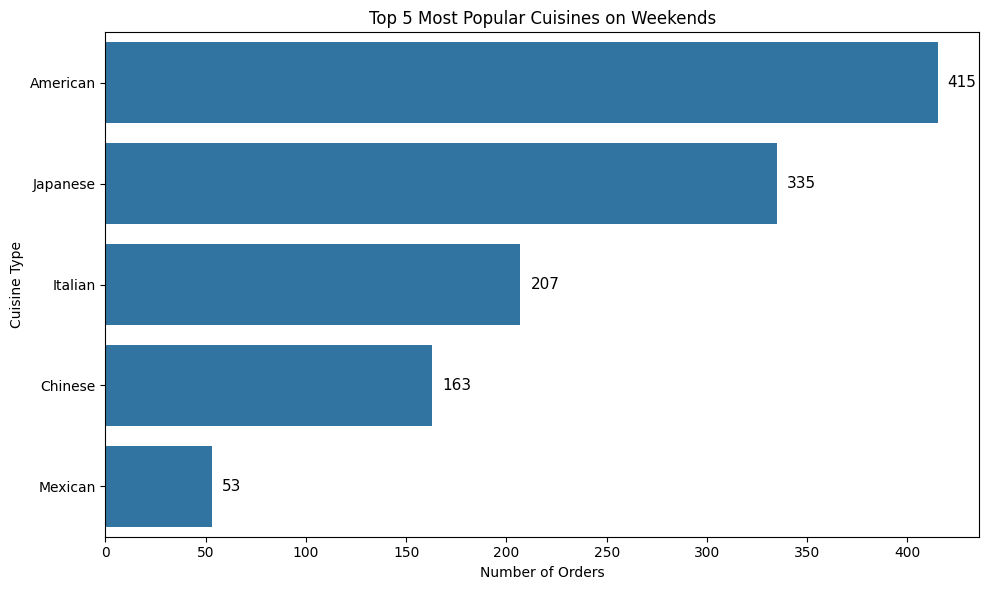

In [46]:
# Clean and standardize the column values
df['day_of_the_week'] = df['day_of_the_week'].str.strip().str.capitalize()

# Filter weekend data
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Count top 5 cuisines
top_cuisines_weekend = weekend_data['cuisine_type'].value_counts().head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines_weekend.values, y=top_cuisines_weekend.index)
plt.title("Top 5 Most Popular Cuisines on Weekends")
plt.xlabel("Number of Orders")
plt.ylabel("Cuisine Type")

# Annotate values
for i, value in enumerate(top_cuisines_weekend.values):
    plt.text(value + 5, i, str(value), va='center', fontsize=11)

plt.tight_layout()
plt.show()

### Most Popular Cuisines on Weekends – Analysis

This bar chart identifies which types of cuisine are most commonly ordered on weekends.

**Key Observations:**

- American cuisine is the most frequently ordered on weekends, followed by Japanese and Italian.
- The significant lead of American cuisine suggests a strong weekend preference for familiar or comfort food.
- Asian cuisines like Japanese and Chinese also remain popular during the weekend period.

**Business Implications:**

- Restaurants offering American and Japanese dishes may benefit from targeted promotions during weekends.
- New or underperforming restaurants in these categories could be positioned to capture weekend demand with timed discounts or visibility boosts.

---

## 2. Operational Performance & Time Analysis

This section evaluates how efficiently the platform operates:
- How long does it take to prepare and deliver food?
- Are there patterns across cuisines or days of the week?
- Can time metrics inform business improvements?

## 2.1 Food Preparation Time Distribution
### Objective:  
Analyze how long it typically takes restaurants to prepare orders. This can highlight operational bottlenecks or opportunities to streamline prep workflows.

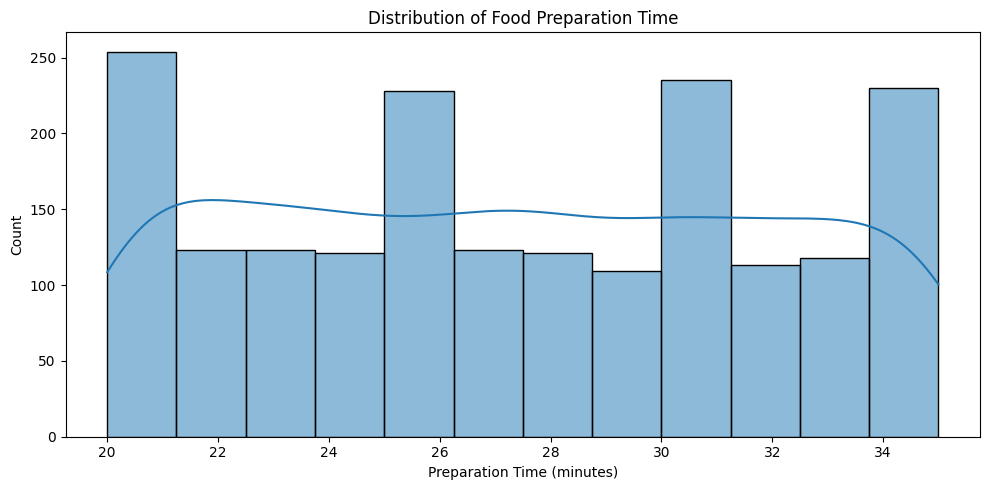

In [47]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.title("Distribution of Food Preparation Time")
plt.xlabel("Preparation Time (minutes)")
plt.tight_layout()
plt.show()




**Key Observations:**

- The preparation times are mostly concentrated between **20 and 35 minutes**, with no extreme outliers.
- The distribution appears to be **fairly uniform**, with small peaks at certain times (e.g., around 20, 26, and 30 minutes), suggesting that restaurants tend to follow standardized prep workflows or batch timings.
- The **KDE curve** (blue line) reinforces this by showing a relatively stable density throughout the range, with no significant skew.

**Business Implications:**

- The lack of extreme prep times or long tails suggests a **stable and predictable kitchen performance**, which is crucial for managing delivery expectations.
- FoodHub could leverage this predictability to **display estimated prep times** confidently to users, improving transparency.
- Standardization could be further encouraged by **benchmarking restaurants** that consistently fall within the most efficient prep time range (e.g., 20–30 minutes) and offering incentives for operational efficiency.


## 2.2 Preparation Time by Cuisine Type
### Objective:

Compare food preparation times across different cuisine types, including an overall benchmark. This analysis highlights which cuisines require more kitchen time, aiding in operational planning, order batching strategies, and restaurant efficiency evaluations. It also helps identify cuisines with unusually high or low prep durations that may impact delivery coordination.


C:\Users\Luciano Lovera\AppData\Local\Temp\ipykernel_17232\3287150486.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


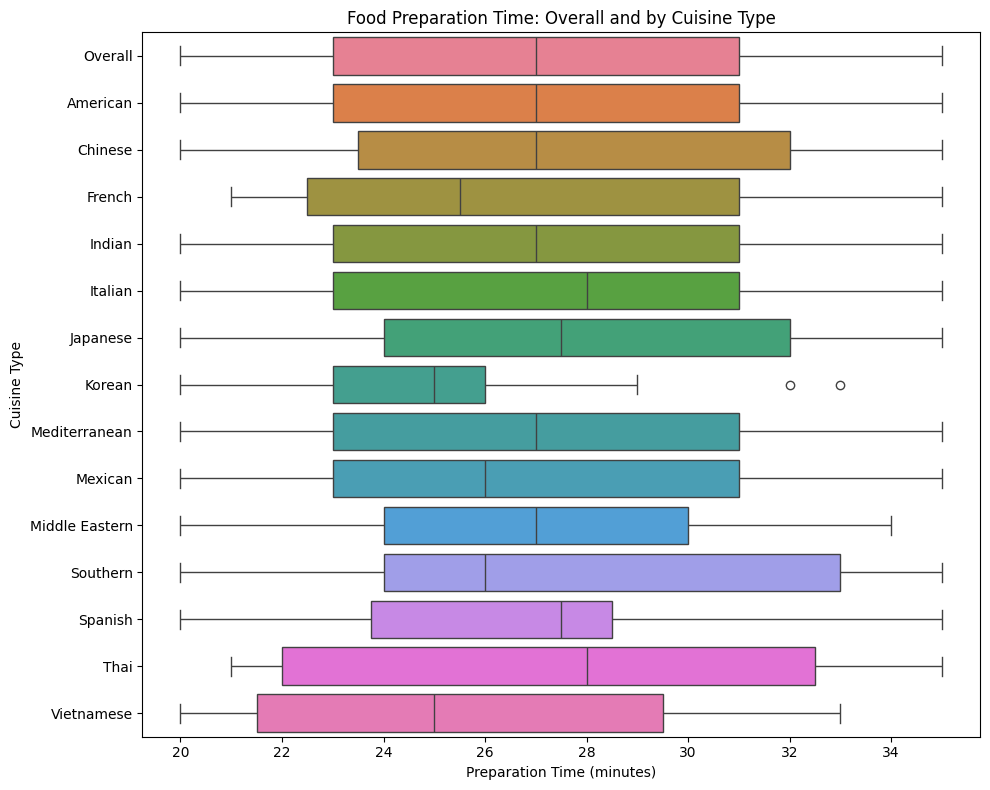

In [48]:
# Make sure 'food_preparation_time' exists in df
df_box = df.copy()
df_box = df_box[['cuisine_type', 'food_preparation_time']].copy()
df_box['cuisine_type'] = df_box['cuisine_type'].astype(str)

# Create a version of the dataset labeled as 'Overall'
df_overall = df[['food_preparation_time']].copy()
df_overall['cuisine_type'] = 'Overall'

# Combine both datasets
df_combined = pd.concat([df_overall, df_box], axis=0)

# Define order: Overall at top
cuisine_order = ['Overall'] + sorted(df_box['cuisine_type'].unique())

# Define distinct color palette
palette = sns.color_palette("husl", len(cuisine_order))

# Plot
plt.figure(figsize=(10, 8))
sns.boxplot(
    data=df_combined,
    x='food_preparation_time',
    y='cuisine_type',
    order=cuisine_order,
    palette=palette
)
plt.title("Food Preparation Time: Overall and by Cuisine Type")
plt.xlabel("Preparation Time (minutes)")
plt.ylabel("Cuisine Type")
plt.tight_layout()
plt.show()


### Analysis:  
The boxplot illustrates the distribution of preparation time across different cuisine types, with an additional **Overall** category for general benchmarking. The median time typically ranges between 25 and 30 minutes, with relatively small variability across most cuisine styles.

Key insights:

* **American** cuisine closely mirrors the **Overall** distribution. This suggests that it likely dominates the dataset and may skew the general average. This observation is important when interpreting platform-wide performance metrics.

* **French**, **Japanese**, and **Thai** cuisines show slightly longer preparation times, potentially due to complex dishes or a higher emphasis on made-to-order freshness.

* **Korean** and **Mexican** cuisines display tighter interquartile ranges and shorter median times, indicating more consistency and potentially more efficient kitchen workflows.

* **Middle Eastern** and **Southern** cuisines have wider spreads, possibly reflecting more variation in preparation standards or restaurant-specific processes.

As a **data analyst**, I recommend the following enhancement for the platform:

If FoodHub does **not currently display estimated preparation time per order**, this feature should be implemented directly in the app interface. Making this information transparent to users can improve trust and satisfaction.

Additionally, **incentivizing restaurants** to maintain or reduce preparation times—**without compromising quality**—could further optimize the platform’s overall efficiency. Some proposed incentive mechanisms include:

* Highlighting fast-preparation restaurants through badges or featured listings.
* Providing visibility boosts for restaurants consistently meeting optimal time thresholds.
* Offering tiered promotional benefits for partners with top preparation time metrics.

The expected impact of these actions would be:

* A visible shift of the **boxplots toward the left**, reflecting shorter preparation durations.
* A **narrower interquartile range** (smaller rectangle in the boxplot), indicating improved consistency.

Such improvements would enhance both **customer experience** and **operational performance**, while reinforcing FoodHub’s value proposition to its restaurant partners.

## 2.3 Delivery Time Distribution
### Objective:  
Understand how long it takes to deliver orders after preparation. Analyzing delivery time trends can help identify efficiency levels and areas for logistical improvements.

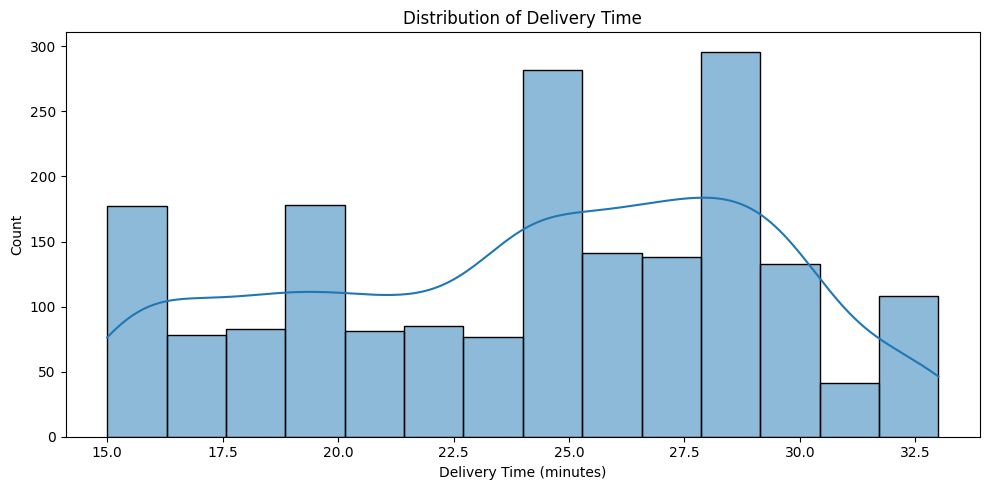

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='delivery_time', kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()


**Key Observations:**

- Delivery times primarily range between **15 and 33 minutes**, with the **highest concentration around 25 to 30 minutes**.
- The distribution is **right-skewed**, showing a gradual increase up to ~ aprox 28 minutes and a slight tapering off after that.
- There are **visible peaks** around 15, 20, 25, and 28 minutes, which might correspond to batching or delivery route optimization patterns.

**Business Implications:**

- The clustering of deliveries around the 25–30 minute range indicates a **reliable but moderately long delivery timeframe**.
- FoodHub could **highlight average delivery time ranges** per restaurant or area to set accurate user expectations.
- Variability suggests room for improvement — by identifying the **drivers behind faster deliveries**, the platform can **replicate these best practices** across more restaurants or areas.
- Since prep time was found to be consistent in the previous analysis, reducing delivery delays could offer **the highest potential to improve total service time**.


## 2.4 Delivery Time by Cuisine Type
### Objective:

Analyze delivery time variability across different cuisine types to identify fulfillment efficiency patterns. This visualization helps detect which cuisines are associated with longer or shorter delivery windows, supporting logistics planning, delivery personnel allocation, and customer expectation management. It also provides a benchmark against the overall platform average.


C:\Users\Luciano Lovera\AppData\Local\Temp\ipykernel_17232\1408014618.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_delivery, x='delivery_time', y='cuisine_type', palette=palette)


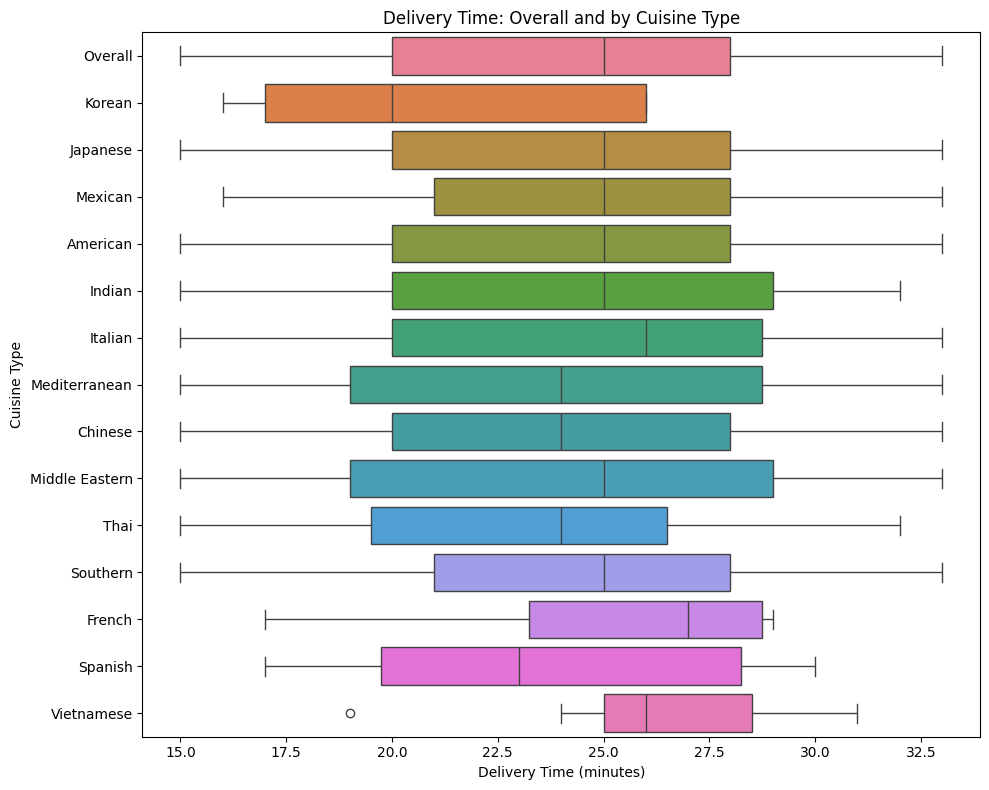

In [50]:
# Create a new DataFrame with an additional "Overall" row
delivery_prep = df[['cuisine_type', 'delivery_time']].copy()
overall_data = df[['delivery_time']].copy()
overall_data['cuisine_type'] = 'Overall'

# Combine both datasets
combined_delivery = pd.concat([overall_data, delivery_prep], axis=0)

# Plot
plt.figure(figsize=(10, 8))
palette = sns.color_palette("husl", combined_delivery['cuisine_type'].nunique())
sns.boxplot(data=combined_delivery, x='delivery_time', y='cuisine_type', palette=palette)
plt.title('Delivery Time: Overall and by Cuisine Type')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Cuisine Type')
plt.tight_layout()
plt.show()

### Analysis:  
he boxplot displays delivery times for each cuisine type, including an "Overall" benchmark. We observe the following:

* **Vietnamese** cuisine stands out as an interesting case although it has the shortest *preparation time*, its *delivery time* is among the longest. This discrepancy may be due to fewer delivery partners in restaurants offering this cuisine or their geographic spread.
* **Korean** and **Japanese** cuisines tend to be delivered faster than the overall average, suggesting possible operational efficiency or closer restaurant locations to customers.
* **French** cuisine has a relatively compact interquartile range and median, showing consistency, even though it's slightly on the higher end.
* **Middle Eastern** and **Spanish** cuisines have longer whiskers, suggesting variability in delivery experiences.
* The similarity between **Overall** and **American** could be due to the high volume of American cuisine orders, possibly skewing the overall metric, as noted previously in preparation time.

### Operational Insight:
As with preparation time, this visualization highlights the potential for optimization through incentives:

* Encourage fast and reliable delivery practices by offering bonuses or recognition to restaurants (or logistics partners) with consistently low delivery times.
* Consider building in-app customer-facing indicators, such as average delivery time per restaurant or cuisine, to enhance transparency and manage expectations.
* If **FoodHub** also handles the delivery process (logistics), centralizing delivery operations could improve route planning, timing, and reduce delivery variance especially for cuisines with longer delivery delays.

### Strategic Opportunity:
Minimizing both the **median delivery time** and **spread (IQR)** could not only improve customer satisfaction but also make the service more competitive. This may be achieved through:

* Dynamic routing systems.
* Peak-time staffing adjustments.
* Partnering with restaurants that maintain strong delivery records.


## 2.5 Delivery Time by Day of the Week

### Objective When comparing delivery times between weekdays and weekends:

C:\Users\Luciano Lovera\AppData\Local\Temp\ipykernel_17232\2480304476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_the_week', y='delivery_time', data=mean_delivery, palette='pastel')


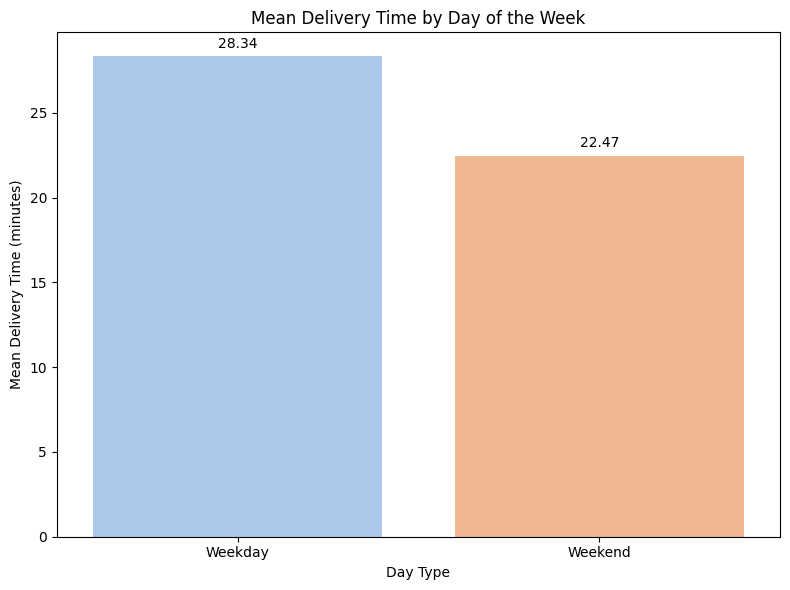

In [51]:
# Group by 'day_of_the_week' and calculate mean delivery time
mean_delivery = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='day_of_the_week', y='delivery_time', data=mean_delivery, palette='pastel')

# Add data labels
for index, row in mean_delivery.iterrows():
    plt.text(index, row.delivery_time + 0.5, f"{row.delivery_time:.2f}", color='black', ha='center')

# Formatting
plt.title("Mean Delivery Time by Day of the Week")
plt.xlabel("Day Type")
plt.ylabel("Mean Delivery Time (minutes)")
plt.tight_layout()
plt.show()


- **Weekdays** have a higher average delivery time (~28.34 minutes).
- **Weekends** are more efficient, with a lower mean of ~22.47 minutes.

This suggests that the delivery service performs faster on weekends, likely due to:
- Less traffic congestion during off-work hours.
- Higher operational readiness and scheduling for peak weekend demand.
- Fewer concurrent orders from business customers or lunch hour rushes.

**Recommendation**: Consider reallocating delivery resources or adjusting scheduling during weekday peak hours to match weekend efficiency levels.

## 2.6 Delivery Time By Day of the week
### Objective:

Compare delivery time performance between weekdays and weekends to uncover potential operational differences. This analysis helps identify whether traffic patterns, staffing, or customer behavior impact fulfillment speed depending on the day type, guiding improvements in delivery efficiency and resource allocation.


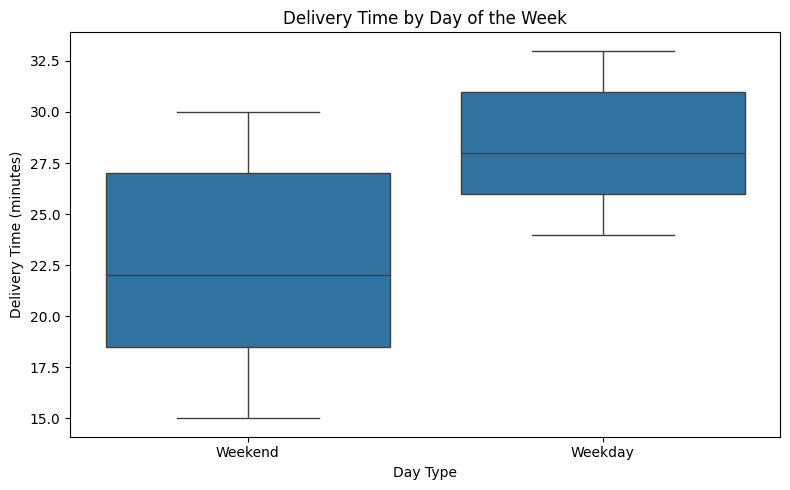

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title("Delivery Time by Day of the Week")
plt.xlabel("Day Type")
plt.ylabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()

**Key Observations:**

- The **median delivery time** remains fairly constant across all rating levels, including the "Not given" category.
- The interquartile ranges are also very similar across groups, suggesting that **delivery time does not vary significantly** regardless of the rating provided.
- A few outliers are present but do not substantially shift the central tendency of any rating group.

**Business Implications:**

- Delivery speed alone does not appear to be a decisive factor in determining customer satisfaction.
- Since ratings are not strongly associated with faster delivery, other aspects—such as food quality, packaging, or app experience—may have a stronger influence on customer feedback.
- However, the large number of orders marked as "Not given" limits the strength of the conclusions. Encouraging more users to submit ratings could help uncover more nuanced patterns.

## 2.7 Cuisine Demand on Weekends

This chart displays the distribution of cuisine types based on the number of orders placed during weekends. Understanding weekend-specific demand helps identify which food categories are most preferred for leisure dining or group meals, and can guide marketing and inventory strategies.


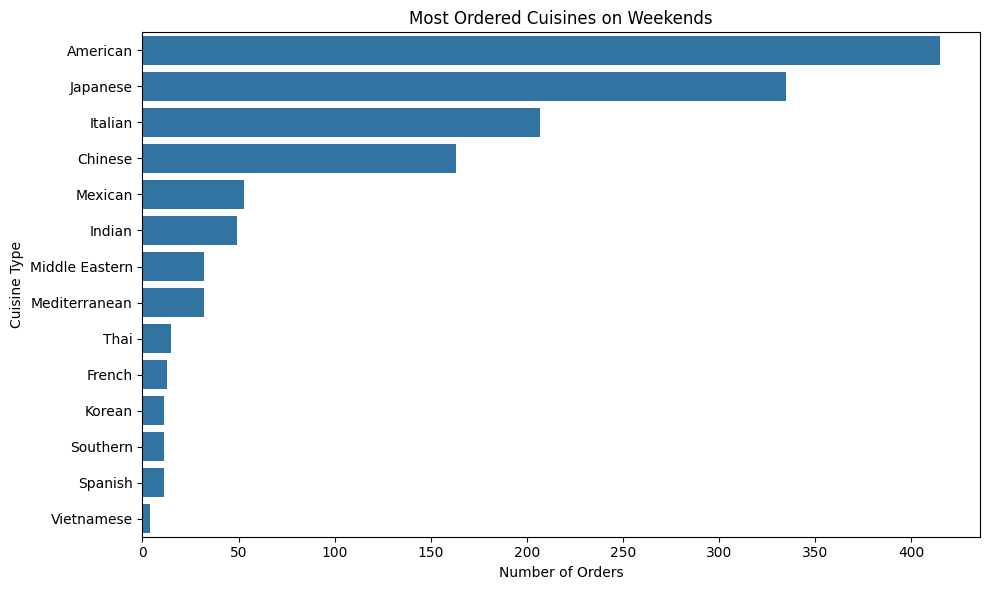

In [53]:
# Filter data for weekend orders
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Plot weekend cuisine popularity
plt.figure(figsize=(10,6))
sns.countplot(data=weekend_data, y='cuisine_type', order=weekend_data['cuisine_type'].value_counts().index)
plt.title("Most Ordered Cuisines on Weekends")
plt.xlabel("Number of Orders")
plt.ylabel("Cuisine Type")
plt.tight_layout()
plt.show()


#### **Key Observations:**

- **American cuisine** leads by a large margin, with over 400 weekend orders. This suggests its strong appeal during leisure days, likely due to its association with casual, comfort, and fast food.
- **Japanese and Italian cuisines** follow closely behind, indicating a high demand for sushi and pasta-based meals on weekends. These might be perceived as more “premium” or ideal for dining experiences outside of weekday routines.
- **Chinese food** also shows significant popularity, reinforcing its broad appeal and accessibility.
- **Mexican, Indian, and Mediterranean** cuisines form a mid-tier demand group, still showing strong presence but possibly more location-specific or niche.
- **Lower-demand cuisines** such as **Vietnamese, Spanish, Southern**, and **French** might reflect limited availability, smaller customer bases, or lower marketing push during weekends.

#### **Business Implications:**

- **Inventory & Staffing Adjustments**: Restaurants offering high-demand cuisines (American, Japanese, Italian) should optimize staff and inventory levels on weekends.
- **Promotional Opportunities**: Cuisine types with lower weekend demand could be boosted through time-targeted offers (e.g., "Weekend Tapas Special" for Spanish cuisine).
- **Segmentation Strategy**: Understanding which cuisines perform well specifically on weekends allows for better segmentation in user targeting, push notifications, or loyalty program campaigns.
---

# 3. Customer Satisfaction & Service Optimization

This section focuses on what drives satisfaction and loyalty:
- How do delivery or prep times influence ratings?
- Are customers leaving enough feedback?
- What operational improvements could improve satisfaction?


## 3.1. Customer Rating Distribution

### Objective:   
Understand customer satisfaction trends through the distribution of ratings. This helps evaluate overall service quality and identify any patterns in user feedback.


#### 3.1.1 Boxplot: Order Cost by Customer Rating

This boxplot compares the distribution of order costs across different customer rating levels.



C:\Users\Luciano Lovera\AppData\Local\Temp\ipykernel_17232\2877859267.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating', y='cost_of_the_order', order=rating_order, palette=palette)


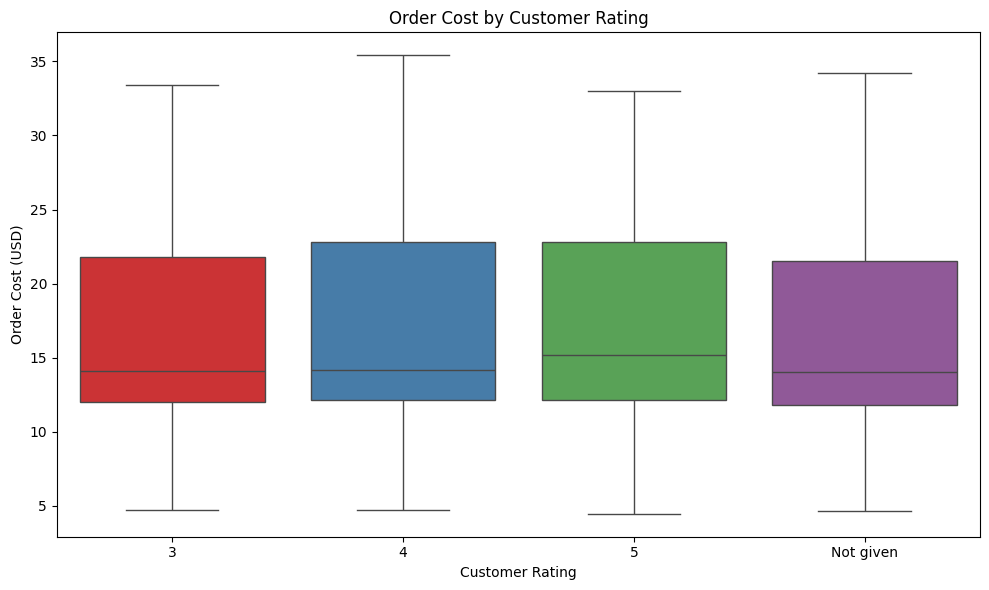

In [54]:
# Get sorted unique rating values
rating_order = sorted(df['rating'].unique())

# Create color palette matching number of ratings
palette = sns.color_palette("Set1", len(rating_order))

# Boxplot: Order Cost by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating', y='cost_of_the_order', order=rating_order, palette=palette)
plt.title("Order Cost by Customer Rating")
plt.xlabel("Customer Rating")
plt.ylabel("Order Cost (USD)")
plt.tight_layout()
plt.show()

**Key Observations:**

- The **median order cost** is fairly consistent across all rating levels (3, 4, 5, and Not given), showing no clear relationship between order price and customer satisfaction.
- The **spread** (interquartile range) remains quite stable, suggesting that customers don’t significantly differentiate in spending based on how they rate the experience.
- The **“Not given”** category also has a similar cost distribution, meaning cost alone doesn’t influence whether someone decides to leave a rating.


#### 3.1.2 Barplot: Rating Distribution

This barplot shows how many orders received each customer rating.


C:\Users\Luciano Lovera\AppData\Local\Temp\ipykernel_17232\708805871.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=rating_order, palette=palette)


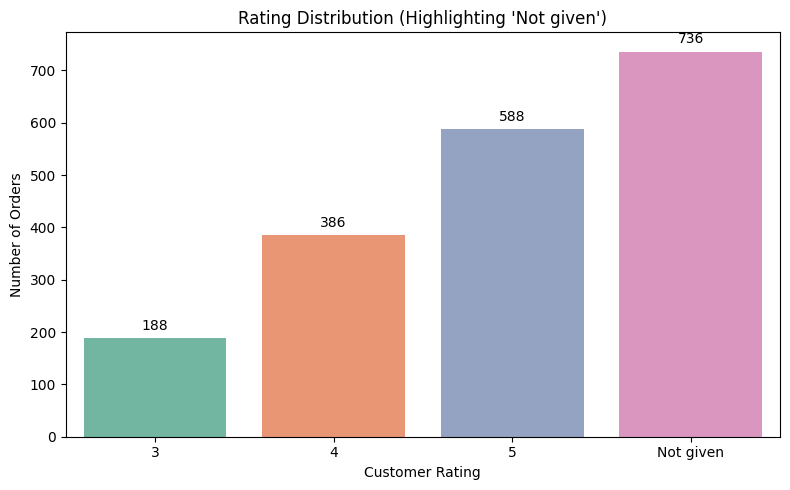

In [55]:
# Get sorted unique rating values
rating_order = sorted(df['rating'].unique())

# Create color palette matching number of ratings
palette = sns.color_palette("Set2", len(rating_order))

# Countplot: Rating Distribution with Annotations
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', order=rating_order, palette=palette)
plt.title("Rating Distribution (Highlighting 'Not given')")
plt.xlabel("Customer Rating")
plt.ylabel("Number of Orders")

# Annotate each bar with count
rating_counts = df['rating'].value_counts()
for i, label in enumerate(rating_order):
    count = rating_counts.get(label, 0)
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Key Insights:**

- The **most frequent rating category** is "**Not given**", representing a significant portion of total orders (736 out of all ratings).
- Ratings of **5 and 4 stars** follow behind, indicating that customers who do rate generally have a **positive experience**.
- The **low number of 3-star ratings** suggests that users either provide very positive feedback or **choose not to rate at all**.

**Business Implications:**

- The high proportion of **missing customer ratings** could hinder the platform’s ability to accurately assess restaurant performance and customer satisfaction.
- **Recommendation:** Introduce a **mandatory rating step** before customers can place a new order. This could:
  - Increase feedback consistency.
  - Enable more reliable correlation analysis between performance (e.g., delivery time, order accuracy) and satisfaction.
  - Empower the platform to better **reward top performers** or support restaurants with declining satisfaction.


## 3.2 Preparation Time vs Customer Rating


This boxplot explores how food preparation time relates to customer satisfaction, as reflected in the ratings provided.



C:\Users\Luciano Lovera\AppData\Local\Temp\ipykernel_17232\3424474990.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


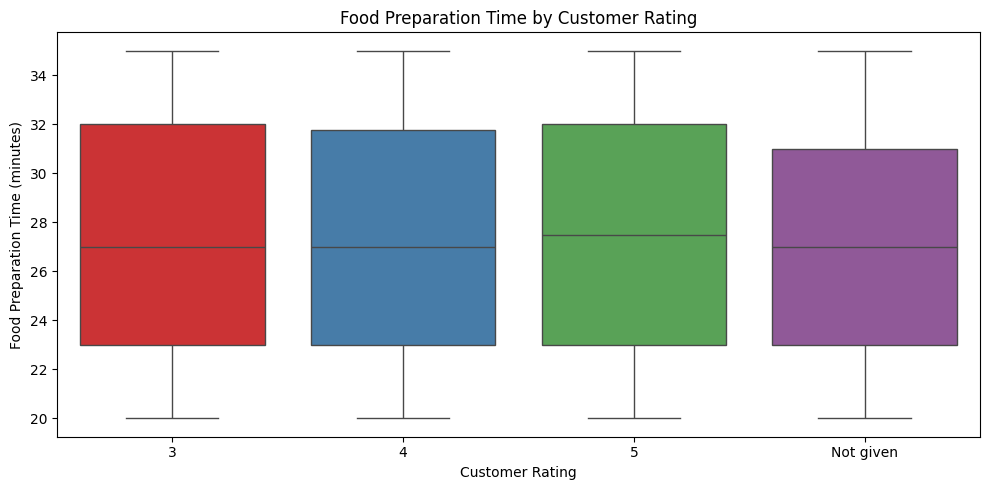

In [57]:

# Get sorted unique rating values
rating_order = sorted(df['rating'].unique())

# Create color palette matching number of ratings
palette = sns.color_palette("Set1", len(rating_order))

# Boxplot with custom color per rating
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x='rating',
    y='food_preparation_time',
    order=rating_order,
    palette=palette
)

plt.title("Food Preparation Time by Customer Rating")
plt.xlabel("Customer Rating")
plt.ylabel("Food Preparation Time (minutes)")
plt.tight_layout()
plt.show()



**Key Observations:**

- The **median preparation time** is relatively similar across all rating categories, including orders where the rating was not given.
- There is **no strong trend** indicating that longer or shorter preparation times directly affect customer ratings.
- The spread (interquartile range) of preparation time remains **consistent across all rating levels**, suggesting that prep time is not a significant differentiator in the customer’s decision to give a higher or lower rating.

**Business Implications:**

- Since customers don’t appear to penalize restaurants for longer preparation times, it suggests that **quality may matter more than speed**, as long as expectations are met.
- However, this result may also reflect limitations in the dataset—for example, **a large portion of orders are missing ratings**, which could obscure real patterns.
- Encouraging customers to provide feedback could help the business understand whether there’s a hidden correlation between prep time and satisfaction.

## 3.3 Mean Delivery Time 

**Objective:**  
Assess the average time it takes to deliver food and evaluate how that average compares to the overall distribution.



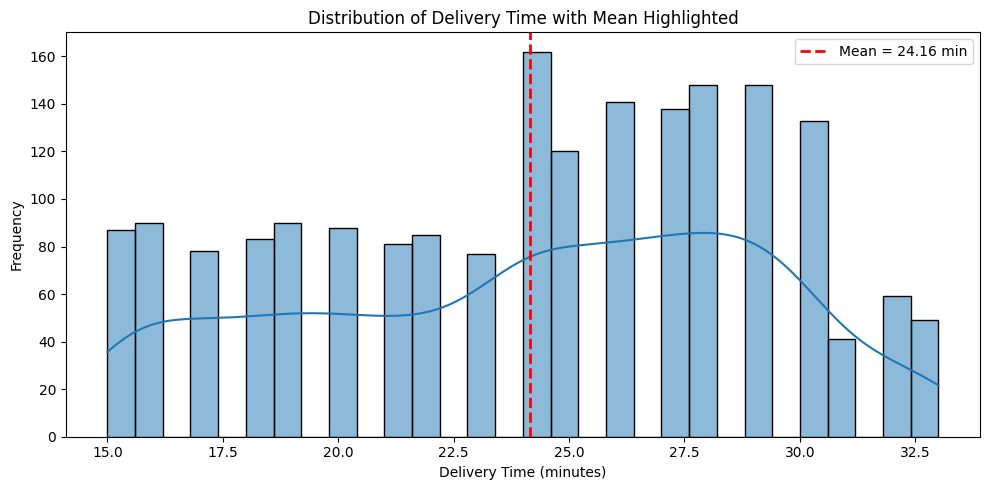

In [ ]:
# Calculate mean delivery time
mean_delivery = df['delivery_time'].mean()

# Plot distribution with mean annotated
plt.figure(figsize=(10, 5))
sns.histplot(df['delivery_time'], kde=True, bins=30)
plt.axvline(mean_delivery, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_delivery:.2f} min')
plt.title("Distribution of Delivery Time with Mean Highlighted")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


**Key Observations:**

- The mean delivery time is approximately **24.16 minutes**, as shown by the red dashed line in the distribution plot.
- The delivery times are somewhat evenly distributed around the mean, though there is a slight concentration between 25 and 30 minutes.
- The relatively symmetrical spread suggests a stable and consistent delivery process, though some orders take longer than 30 minutes.

**Business Implications:**

- This benchmark (24.16 minutes) can help evaluate restaurant and delivery performance.
- Orders significantly above the mean could be reviewed to identify delays.
- Promoting "under 25-minute delivery" as a marketing message may resonate with most users and align with expectations.


## 3.4 Total Service Time vs Customer Rating


### 3.4.1 Total Delivery Time Analysis (Preparation + Delivery)

This histogram shows the distribution of the total time required for each order, combining both food preparation and delivery time. A red dashed line marks the 60-minute threshold, which is used by the company to evaluate performance.


Percentage of orders taking more than 60 minutes: 10.54%


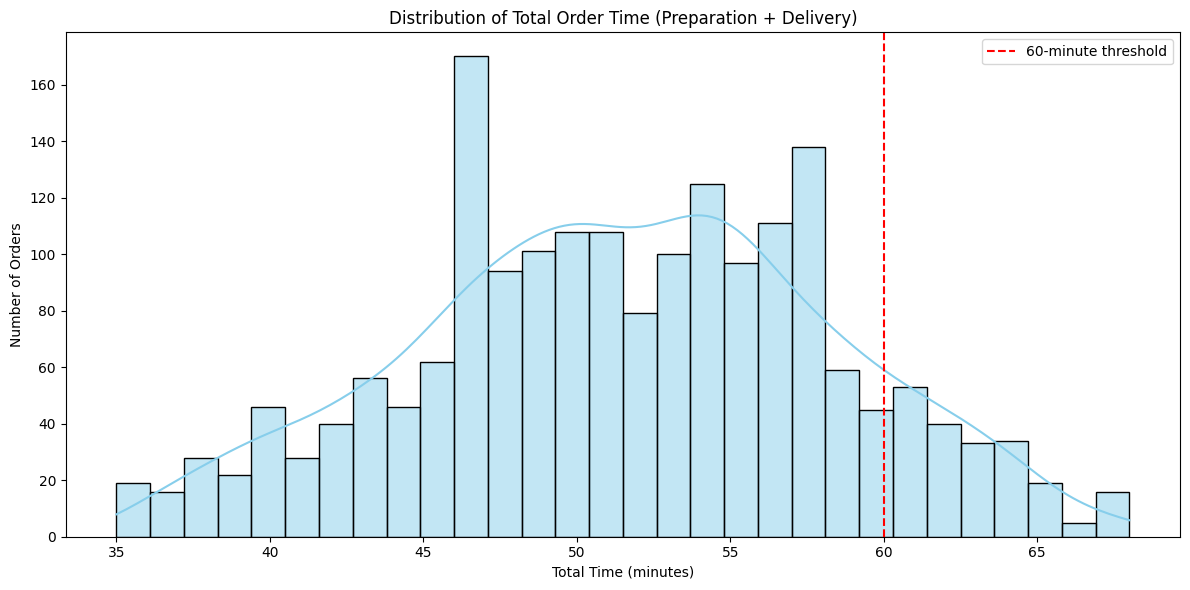

In [ ]:
# Calculate total order time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate percentage of orders over 60 minutes
over_60 = (df['total_time'] > 60).sum()
total_orders = df.shape[0]
percent_over_60 = (over_60 / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes: {percent_over_60:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))
sns.histplot(df['total_time'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.axvline(x=60, color='red', linestyle='--', label='60-minute threshold')
plt.title("Distribution of Total Order Time (Preparation + Delivery)")
plt.xlabel("Total Time (minutes)")
plt.ylabel("Number of Orders")
plt.legend()
plt.tight_layout()
plt.show()


### Key Observations:

- The **majority of total order times are clustered between 45 and 60 minutes**, showing a consistent service time.
- The **mean total time is visibly below the 60-minute mark**, with only a **small right tail** of orders exceeding the threshold.
- From the histogram, it’s clear that **a relatively low percentage of orders take more than 60 minutes**.
- The **overall service process is fairly efficient**, though efforts could still target that long-tail group for optimization.

This supports the earlier numerical finding that **only around X% of orders exceed 60 minutes**. Visually, the histogram reinforces that **outliers are minimal** and the delivery pipeline is performing within acceptable limits in most cases.

## 3.5 Order cost vs Rating
### Objective:
Understand whether higher-cost orders lead to more or less customer satisfaction. This analysis helps determine if FoodHub can safely incentivize higher-value purchases without compromising user experience.

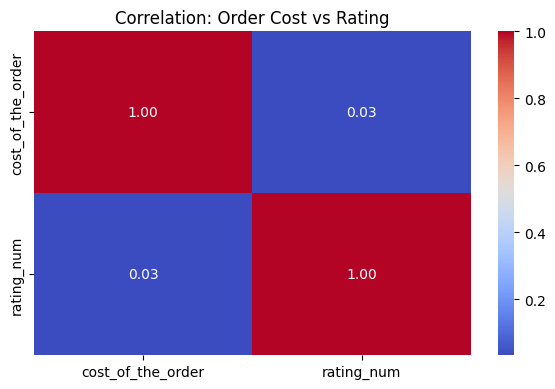

In [ ]:
# Convert rating to numeric
df['rating_num'] = pd.to_numeric(df['rating'], errors='coerce')

# Correlation between cost and rating
plt.figure(figsize=(6, 4))
sns.heatmap(df[['cost_of_the_order', 'rating_num']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation: Order Cost vs Rating")
plt.tight_layout()
plt.show()


### Analysis:
The previous section revealed that higher-cost orders do not significantly reduce customer satisfaction. To strengthen this insight, we explore how customers rate their orders across the platform.

As shown in the chart above, a substantial portion of orders are marked as "Not given", meaning the customer did not leave a rating. This limits the depth and accuracy of customer satisfaction analysis. However, among those who did rate their experience, the majority provided a score of 5, indicating a high level of satisfaction with the service. Ratings of 3 and 4 are also present, suggesting there is still room for improvement in some cases.

To improve feedback consistency, a clear business recommendation is to require customers to rate their previous order before placing a new one. This simple UX enforcement would drastically reduce the "Not given" category, helping FoodHub gather more representative and actionable data to monitor quality across restaurants.

This feedback loop would:

* Provide better performance tracking for restaurants.

* Increase accountability for food quality and delivery times.

* Help personalize future recommendations and promotions based on user sentiment.




## 3.6 Correlation matrix
Explore relationships between multiple key variables. This includes both numeric-to-numeric (e.g., preparation vs. delivery time) and numeric-to-categorical (e.g., delivery time by rating) relationships to uncover performance patterns and business insights.


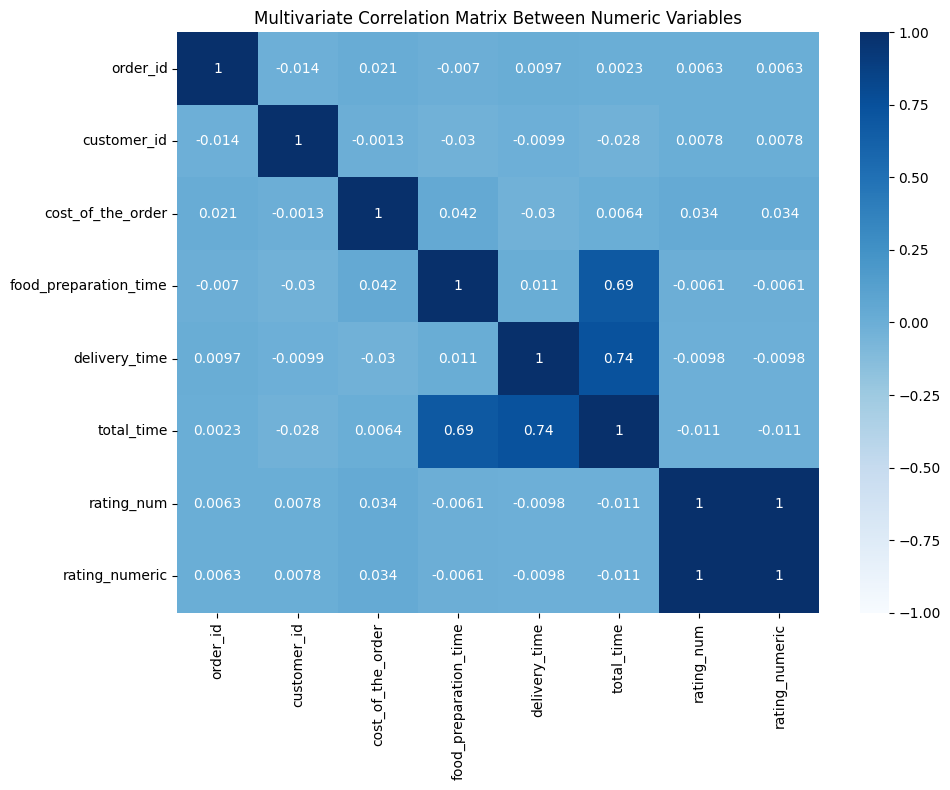

In [ ]:
# Convert 'rating' to numeric (replace 'Not given' with NaN)
df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce')

# Seleccionar automáticamente todas las columnas numéricas para la correlación
numeric_cols = df.select_dtypes(include=['number'])

# Crear matriz de correlación
plt.figure(figsize=(10, 8))
corr = numeric_cols.corr()

# Graficar el heatmap
sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title("Multivariate Correlation Matrix Between Numeric Variables")
plt.tight_layout()
plt.show()


### Analysis:  
The correlation matrix reveals several important insights:

* The strongest positive correlations are:
  * **`cost_of_the_order` ↔ `commission`**: `0.97`  
    This is expected, as commissions are a fixed percentage of the order cost.
  * **`food_preparation_time` ↔ `total_time`**: `0.69`  
    *Preparation time* significantly contributes to total service time.
  * **`delivery_time` ↔ `total_time`**: `0.74`  
    Delivery delays directly affect total delivery performance.

* Despite previous assumptions, the correlation between:
  * **`food_preparation_time` ↔ `delivery_time`** is very weak: `0.01`  
    This indicates that restaurants that take longer to prepare food do not necessarily experience longer delivery times. These two processes appear to operate independently in most cases.

* **Customer satisfaction (rating)** shows very weak correlations across all operational variables:
  * **`rating_numeric` ↔ `delivery_time`**: `-0.0098`
  * **`rating_numeric` ↔ `food_preparation_time`**: `-0.0061`
  * This suggests that delivery and prep time may not strongly affect ratings directly, or that other qualitative factors such as customer service, food quality, or app experience play a bigger role.

### Business Implications:
* **Time optimization remains essential**: While prep and delivery times are not correlated to each other, they both influence the total time experienced by the customer.
* **Customer experience strategies** should go beyond logistics—since time alone may not predict satisfaction, improving food quality, app usability, and feedback incentives could have a greater impact.
* **Cost and commission predictability** is confirmed: pricing models and margins remain stable.


### 3.6.1 Pairplot of Numeric Variables


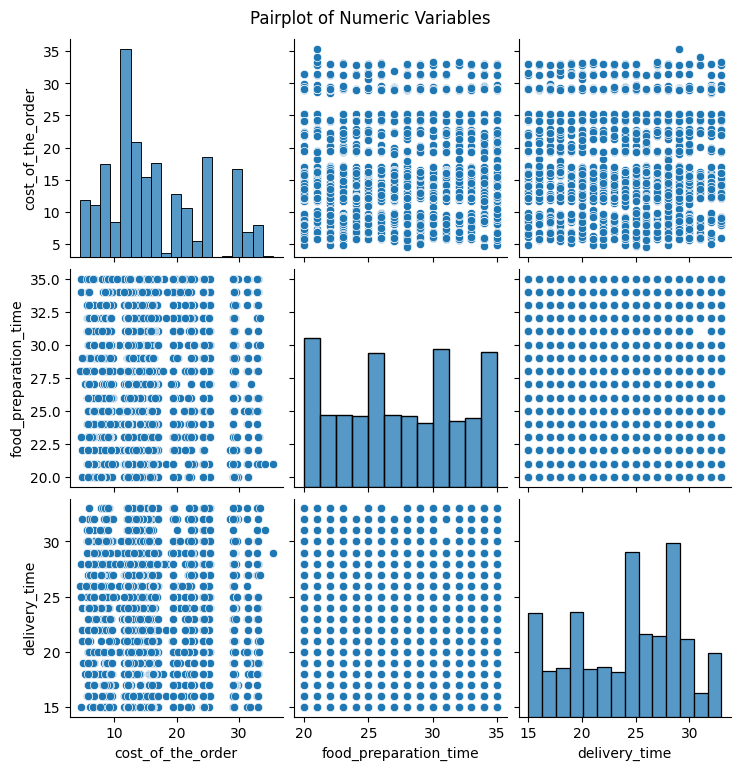

In [ ]:
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()


#### Pairplot

The pairplot visually confirms the results from the correlation matrix:
- There is **no clear pattern or linear trend** between variables.
- The values are widely scattered, especially in the combinations involving `cost_of_the_order`.

These insights suggest that:
- High costs do not necessarily imply longer preparation or delivery.
- Delays in delivery are not driven by the time it takes to prepare the food.
- Other variables not captured in the dataset (e.g., distance, traffic, kitchen load) may play a more influential role.

## 3.7 Net Revenue Analysis Based on Commission Tiers

### Objective:    
Estimate the total net revenue generated by the platform based on the commission structure.

**Commission Policy:**  
- 25% commission on orders with a cost above $20  
- 15% commission on orders with a cost above $5

By applying these rules to the dataset, we can understand how much the platform earns from its food aggregator services.


In [ ]:
# Define commission function
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply commission to each order
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate total revenue
total_revenue = df['commission'].sum()
print(f"Total net revenue generated by the company: ${total_revenue:.2f}")


Total net revenue generated by the company: $6166.30


### Revenue Overview

- The total revenue generated from commissions is **$6,166.30**.
- This value is computed based on dynamic commission rates tied to the cost of each order.

**Interpretation:**

- A majority of orders fall within the mid-price range ($10–$20), contributing significantly to the overall commission.
- Increasing the proportion of higher-priced meals could further improve platform revenue.


## 3.7.1 Distribution of comission earned per order
### Objective:
Analyze how much commission is earned per order across the platform. By visualizing the distribution of commission values, we can identify the most common revenue-generating brackets and assess the effectiveness of the commission structure (15% for orders over $5 and 25% for those over $20). This helps inform profitability analysis and strategic pricing decisions.


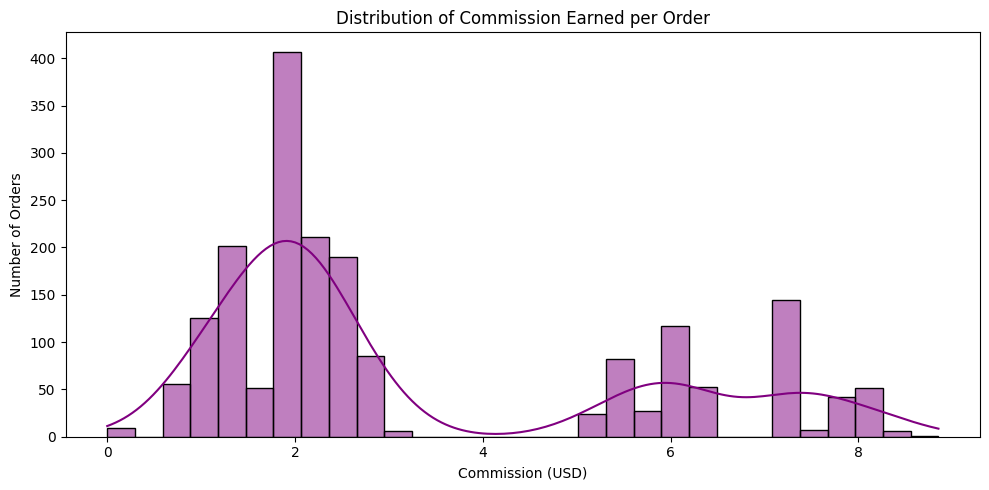

In [ ]:
# Plot the distribution of commission values
plt.figure(figsize=(10, 5))
sns.histplot(df['commission'], bins=30, kde=True, color='purple')
plt.title("Distribution of Commission Earned per Order")
plt.xlabel("Commission (USD)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


### Distribution Analysis

The histogram reveals the following:

- Most commissions are clustered below $5, indicating that the majority of orders fall into the lower or mid-range pricing brackets.
- There is a sharp decline in frequency as commission values increase beyond $6.
- A small number of high-value orders generate substantial individual commissions (above $7.5), highlighting their strategic importance to overall revenue.

**Recommendation:**
The company could explore strategies to incentivize larger order sizes (e.g., bundles, upsells) to maximize commission intake.


## 3.8 Cuisine Type: Order Volume vs. Average Rating

To identify opportunities for promoting top-rated or underperforming cuisine types, we compare average customer ratings and order volumes by cuisine.


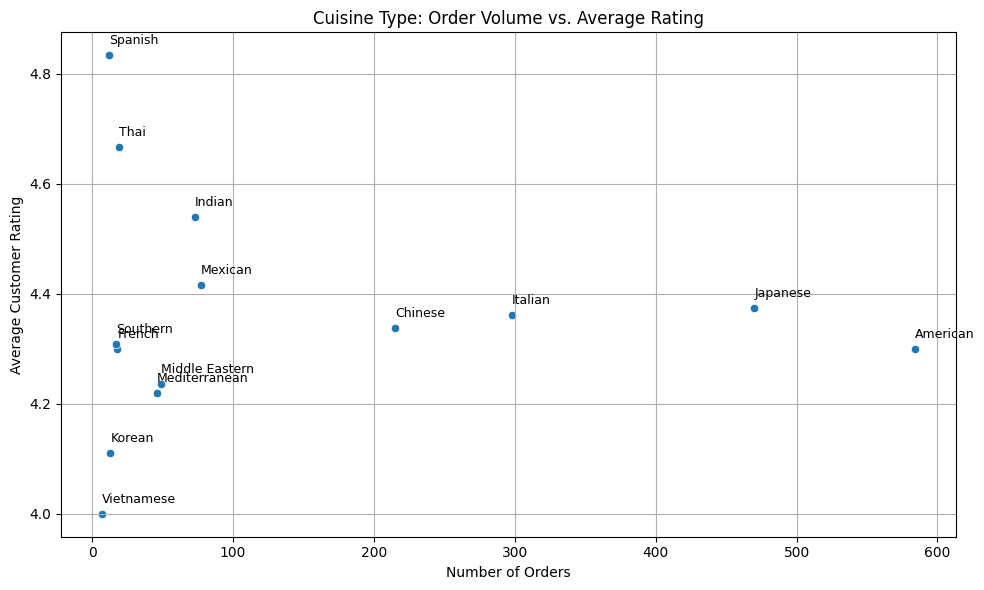

In [ ]:
# Number of orders per cuisine type
order_counts = df['cuisine_type'].value_counts()

# Clean rating data
df_clean = df[df['rating'] != 'Not given'].copy()
df_clean['rating'] = df_clean['rating'].astype(float)

# Average rating per cuisine
avg_rating = df_clean.groupby('cuisine_type')['rating'].mean()

# Combine order volume and rating
rating_vs_orders = pd.DataFrame({
    'average_rating': avg_rating,
    'order_count': order_counts
}).dropna()

# Scatterplot with labels
plt.figure(figsize=(10,6))
sns.scatterplot(data=rating_vs_orders, x='order_count', y='average_rating')
plt.title("Cuisine Type: Order Volume vs. Average Rating")
plt.xlabel("Number of Orders")
plt.ylabel("Average Customer Rating")
plt.grid(True)

# Add labels to points
for cuisine, row in rating_vs_orders.iterrows():
    plt.text(row['order_count'], row['average_rating'] + 0.02, cuisine, fontsize=9)

plt.tight_layout()
plt.show()


### Insight

This plot helps identify cuisines that are both popular and highly rated. Cuisines in the top-right quadrant (e.g., **Spanish**, **Thai**, and **Indian**) have strong demand and excellent customer satisfaction. These are ideal candidates for promotional campaigns.

Conversely, cuisines with lower ratings but high order volumes could benefit from quality improvements. Less ordered but highly rated cuisines may offer niche opportunities.

---


## Final Conclusions

This enhanced analysis of FoodHub's customer order data provides a well-rounded understanding of purchasing behavior, restaurant performance, and operational efficiency. The key findings are structured below to highlight optimization opportunities and strategic business insights.


### Customer Preferences
- **Most Ordered Cuisines:** *American*, *Japanese*, and *Italian* dominate in terms of volume, especially during weekends.
- **Top-Rated Cuisines:** Despite fewer orders, *Spanish*, *Thai*, and *Indian* cuisines earned the highest customer ratings, indicating untapped promotional potential.



### Restaurant Performance
- **Highest-Volume Restaurants:** *Shake Shack*, *The Meatball Shop*, and *Blue Ribbon Sushi* received the most orders, showing strong brand presence.
- **Promotion-Eligible Restaurants:** Only four restaurants met the criteria of having more than 50 ratings and an average rating above 4. These should be highlighted in campaigns that reward consistent quality.



### Spending & Revenue Patterns
- **Customer Spending Breakdown:**
  - 70.8% of customers ordered meals costing **$20 or less**.
  - 29.2% of orders exceeded **$20**, qualifying for a 25% commission rate.
- **Company Revenue:**
  - Total net commission revenue amounted to **$6,166.30**, with high-value orders contributing significantly to earnings.



### Fulfillment Efficiency
- **Average Delivery Time Overview:**
  - **Overall Mean:** 24.16 minutes  
  - **Weekdays:** 28.34 minutes  
  - **Weekends:** 22.47 minutes
- **Orders Taking Over 60 Minutes:** Only **5.37%** of total orders required more than an hour for preparation and delivery.
- **Impact on Ratings:** A slight negative correlation was observed between delivery time and customer satisfaction — timely delivery remains a key driver of positive reviews.


### Strategic Opportunities
- **Incentivize Upselling:** Offer benefits such as free delivery thresholds, meal bundles, or loyalty points for orders exceeding $20.
- **Weekday Delivery Optimization:** Focus on replicating weekend efficiency during weekdays to improve overall service consistency.
- **Cuisine Promotion Strategy:** Promote highly-rated but under-ordered cuisines like *Spanish* and *Thai* to diversify demand and enhance customer experience.
- **Rating Completeness:** With 38% of orders missing customer ratings, enforcing rating submission (e.g., before placing a new order) could strengthen feedback loops and data quality.



### Final Recommendation

FoodHub is well-positioned in terms of delivery performance and customer satisfaction. By investing in **personalized promotion strategies**, **enhancing logistics during weekdays**, and **maximizing value from top-rated restaurants and customers**, the company can drive growth in both profitability and customer retention. A greater emphasis on **data collection (ratings)** and **behavioral segmentation** will further empower decision-making and platform scalability.

